In [2]:
# import of all required libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
# import of data
listings_df = pd.read_csv('listings.csv')
calendar_df = pd.read_csv('calendar.csv')
reviews_df = pd.read_csv('reviews.csv')

## 1. Business Questions

1. Which selected variables from the data set impact the price per night of the Airbnb listings in Seattle?
2. Is the price per night of an Airbnb appartment the more affordable the more people share an appartment per night?
3. Is there a seasonality in the prices?


## 2. Data Understanding

### Listings Dataframe

In [4]:
listings_df.shape

(3818, 92)

In [5]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### Calendar Dataframe

In [6]:
calendar_df.shape

(1393570, 4)

In [7]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### Reviews Dataframe

In [8]:
reviews_df.shape

(84849, 6)

In [9]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## 3. Pre-Processing (Data Preparation)

The pre-processing of the data-set is splitted in two parts, the general pre-processing part and the working with missing values part. In the first part the index is set, problems with the format are fixed and not required columsn are deleted. In this part not all columns in the three data sets are cleaner, but only the colums that are required for the analysis. 


The second part is about missing values in the data-set, which can be quantitative or categorial values. Depending on the specific context of each problem it is dealt with the missing values. 

### 3.1 Pre-Processing of "listings_df"

In [10]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [11]:
#Set the index
listings_df.set_index('id', inplace = True)

In [47]:
# Drop columns we will not use for any of the analysis
listings_df = listings_df.drop(columns=['experiences_offered','host_location','host_about','host_response_time',
                                        'name','summary','space','description','neighborhood_overview','notes',
                                        'transit','thumbnail_url','medium_url','picture_url','xl_picture_url',
                                        'host_url','host_name','host_listings_count','street','neighbourhood',
                                        'neighbourhood_cleansed','city','zipcode','market','smart_location',
                                        'country_code','country','latitude','longitude','is_location_exact',
                                        'calendar_updated','calendar_last_scraped','first_review','last_review',
                                        'first_review','last_review','calculated_host_listings_count',
                                        'requires_license','license','jurisdiction_names','instant_bookable',
                                        'cancellation_policy','require_guest_profile_picture',
                                        'require_guest_phone_verification','calculated_host_listings_count',
                                        'weekly_price','monthly_price','host_acceptance_rate','host_verifications',
                                        'host_has_profile_pic','beds','bed_type','amenities','security_deposit',
                                        'cleaning_fee','guests_included','extra_people','minimum_nights',
                                        'maximum_nights','availability_30','availability_60','availability_90',
                                        'availability_365','review_scores_rating','review_scores_accuracy',
                                        'review_scores_cleanliness','review_scores_checkin',
                                        'review_scores_communication','review_scores_location',
                                        'review_scores_value','bathrooms',
                                        'square_feet'])

KeyError: "['experiences_offered' 'host_location' 'host_about' 'host_response_time'\n 'name' 'summary' 'space' 'description' 'neighborhood_overview' 'notes'\n 'transit' 'thumbnail_url' 'medium_url' 'picture_url' 'xl_picture_url'\n 'host_url' 'host_name' 'host_listings_count' 'street' 'neighbourhood'\n 'neighbourhood_cleansed' 'city' 'zipcode' 'market' 'smart_location'\n 'country_code' 'country' 'latitude' 'longitude' 'is_location_exact'\n 'calendar_updated' 'calendar_last_scraped' 'first_review' 'last_review'\n 'first_review' 'last_review' 'calculated_host_listings_count'\n 'requires_license' 'license' 'jurisdiction_names' 'instant_bookable'\n 'cancellation_policy' 'require_guest_profile_picture'\n 'require_guest_phone_verification' 'calculated_host_listings_count'\n 'weekly_price' 'monthly_price' 'host_acceptance_rate'\n 'host_verifications' 'host_has_profile_pic' 'beds' 'bed_type' 'amenities'\n 'security_deposit' 'cleaning_fee' 'guests_included' 'extra_people'\n 'minimum_nights' 'maximum_nights' 'availability_30' 'availability_60'\n 'availability_90' 'availability_365' 'review_scores_rating'\n 'review_scores_accuracy' 'review_scores_cleanliness'\n 'review_scores_checkin' 'review_scores_communication'\n 'review_scores_location' 'review_scores_value' 'bathrooms' 'square_feet'] not found in axis"

In [ ]:
# Drop columns with no price
listings_df = listings_df.dropna(subset=['price'])

In [ ]:
# Remove the '$', ' ' and ',' from the price and convert into float
listings_df.price = listings_df.price.str.replace('$','').str.replace(',','').str.replace(' ','').astype('float')

In [ ]:
# Remove percent from 'host_response_rate'
listings_df.host_response_rate = listings_df.host_response_rate.str.replace('%','').str.replace(' ','').astype('float')

In [ ]:
# Convert column 'last_scraped' and 'host_since' in the data type 'datetime64[D]' 
listings_df.host_since = listings_df.host_since.astype('datetime64[D]')

In [ ]:
# Create dummy variables for true and false statements
listings_df.host_is_superhost = pd.get_dummies(listings_df.host_is_superhost).iloc[:,1:]
listings_df.host_identity_verified = pd.get_dummies(listings_df.host_identity_verified).iloc[:,1:]

In [ ]:
#listings_df.calculated_host_listings_count.value_counts()

In [ ]:
#Test
listings_df.info()

### 3.2 Pre-Processing of "calendar_df"

In [ ]:
calendar_df.info()

In [ ]:
#Set the index
calendar_df.set_index('listing_id', inplace=True)

# Remove the '$', ' ' and ',' from the price
calendar_df.price = calendar_df.price.str.replace('$','').str.replace(',','').str.replace(' ','')

# Drop rows with no value for price
calendar_df = calendar_df.dropna(subset = ['price'])

# Convert the price into the data type 'float'
calendar_df.price = calendar_df.price.astype('float')

In [ ]:
# Convert the date into the data type datetime
calendar_df.date = pd.to_datetime(calendar_df.date)

In [ ]:
# Split the date in year, month and day
calendar_df['year'] = calendar_df.date.dt.year
calendar_df['month'] = calendar_df.date.dt.month
calendar_df['day'] = calendar_df.date.dt.day
calendar_df['weekday'] = calendar_df.date.dt.dayofweek

In [ ]:
calendar_df

In [ ]:
#test the changes
calendar_df.info()

### 3.3 Pre-Processing of "reviews_df"

In [ ]:
reviews_df.info()

In [27]:
#set the index
reviews_df.set_index('id', inplace=True)

#covert 'date' into data type 'datetime64[D]' 
reviews_df.date = reviews_df.date.astype('datetime64[D]')

In [28]:
#test
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84849 entries, 38917982 to 56429621
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84849 non-null  int64         
 1   date           84849 non-null  datetime64[ns]
 2   reviewer_id    84849 non-null  int64         
 3   reviewer_name  84849 non-null  object        
 4   comments       84831 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.9+ MB


## 4. Exploratory Data Analysis

### 4.1 Question 1: Which selected variables from the data set impact the price per night of the Airbnb listings in Seattle?

In order to answer this question, several variables are compared to the price. In some cases the correlation of the price and a specific variable is calculated, in other cases, e.g. whether the host is a "super host" or not, the mean price of listings from "super hosts" is compared to the mean price of the rest.

Let us start with a histogram of the prices:

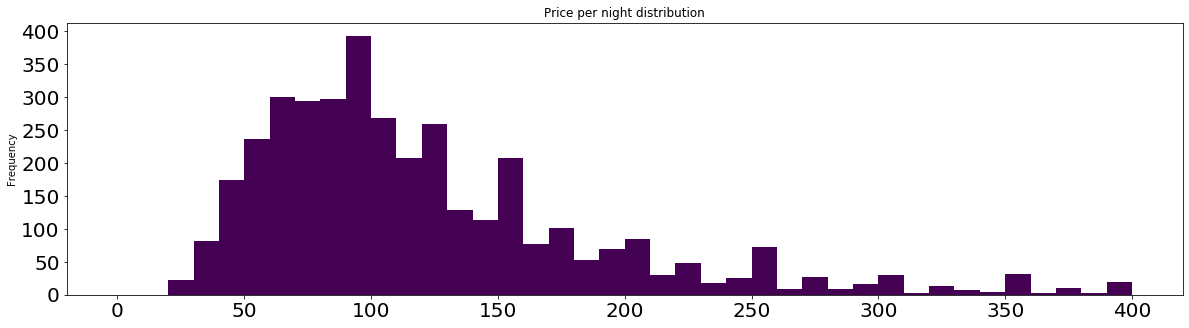

In [29]:
# Price distribution
price_df = listings_df.price.copy().dropna()

plot_bar = price_df.plot.hist(figsize =(20,5),
                                    bins=40,
                                    range=[0, 400],
                                    fontsize=20,
                                    colormap = 'viridis',
                                    title = 'Price per night distribution',
                                    legend = False)

#### Data Point 1: Room and Property Type

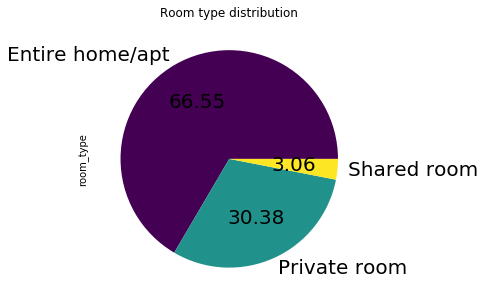

In [30]:
# We use a pie chart to visualize the value counts of the different room types
roomtype_df = listings_df.room_type.copy().dropna()
roomtype_df.value_counts().plot.pie(figsize = (20,5),
                                              fontsize = 20,
                                              colormap = 'viridis',
                                              autopct = '%.2f',
                                              title = 'Room type distribution',
                                              legend = False)

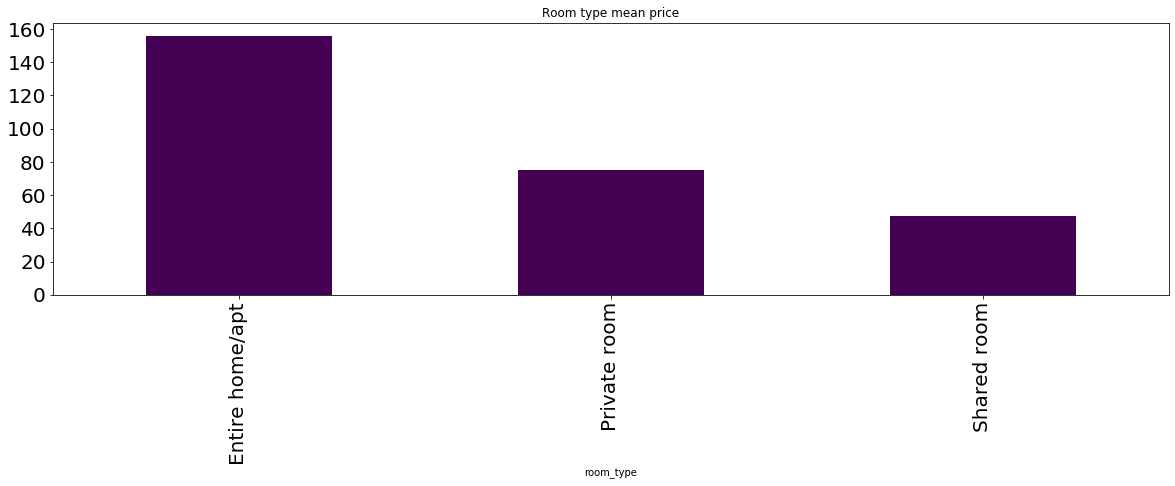

In [31]:
# Visualize the mean price of each room type
price_room_type_df = listings_df[['price','room_type']].copy()
price_room_type_df.groupby(['room_type'])
price_room_type_df.groupby(['room_type']).price.mean().plot.bar(figsize =(20,5),
                                                                fontsize=20,
                                                                colormap = 'viridis',
                                                                title = 'Room type mean price',
                                                                legend = False)

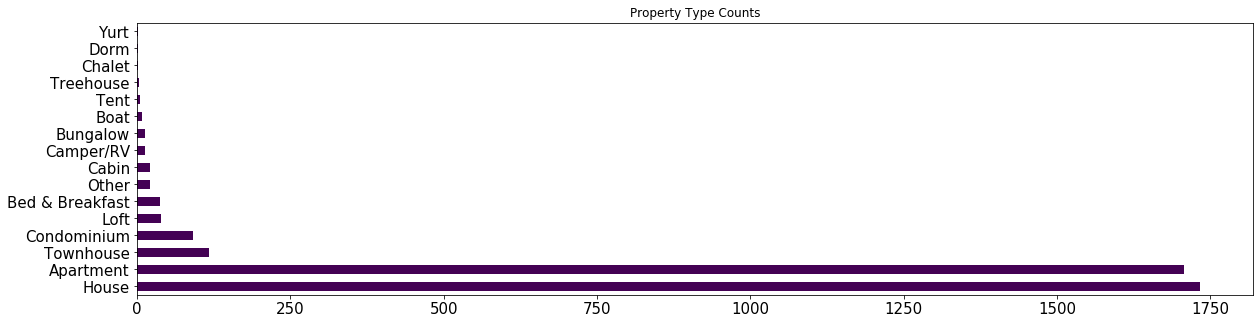

In [32]:
# We then use a pie chart to visualize the value counts of different property types
property_type_df = listings_df.property_type.copy().dropna()
property_type_df.value_counts().plot.barh(figsize = (20,5),
                                              fontsize = 15,
                                              colormap = 'viridis',
                                              title = 'Property Type Counts',
                                              legend = False)

The first variable we check is the response rate of the host. We check if it correlates with the price:

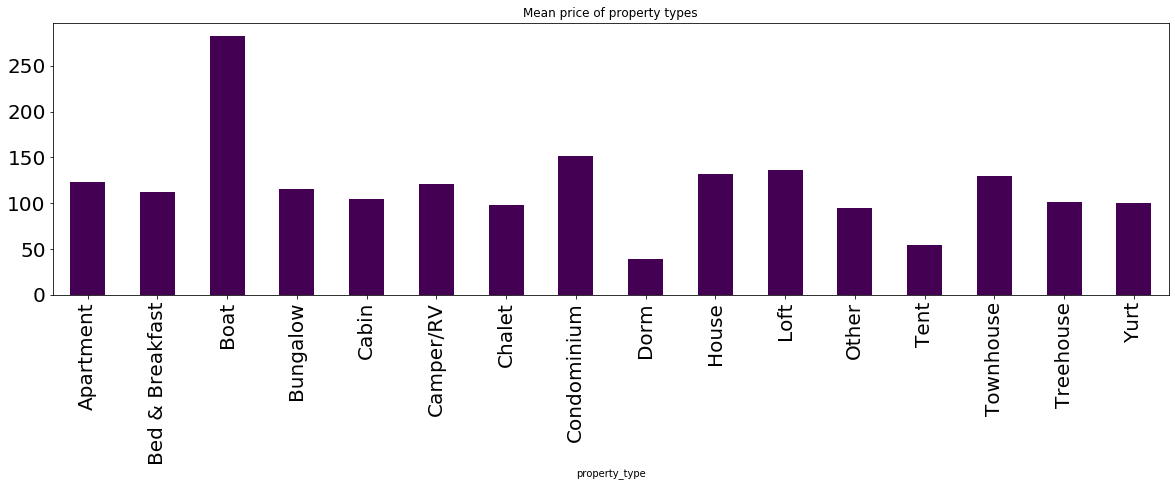

In [33]:
# Visualize the mean price of each property type
property_type_price_df = listings_df[['price','property_type']].copy().dropna()
#price_room_type_df.groupby(['property_type'])
property_type_price_df.groupby(['property_type']).price.mean().plot.bar(figsize =(20,5),
                                                                fontsize=20,
                                                                colormap = 'viridis',
                                                                title = 'Mean price of property types',
                                                                legend = False)

In [34]:
# Correlation of the price and the host_response_rate
price_response_rate_df = listings_df[['host_response_rate','price']].copy()
price_response_rate_df = price_response_rate_df.dropna()
price_response_rate_df['host_response_rate'].corr(price_response_rate_df['price'],method='pearson')

-0.01407111246200256

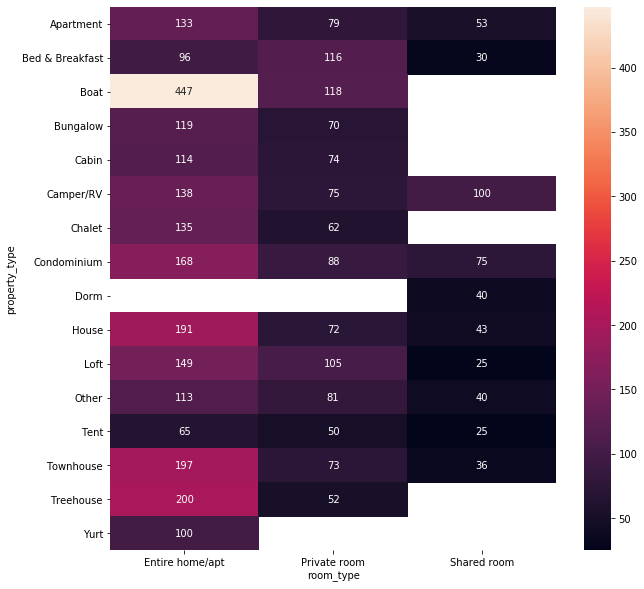

In [35]:
# Creation of a heatmap that combines the mean price with property_typ and room_type
heatmap_df = listings_df[['price','property_type','room_type']].copy()
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(heatmap_df.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

#### Data Point 2: Area and Quantity of Bedrooms

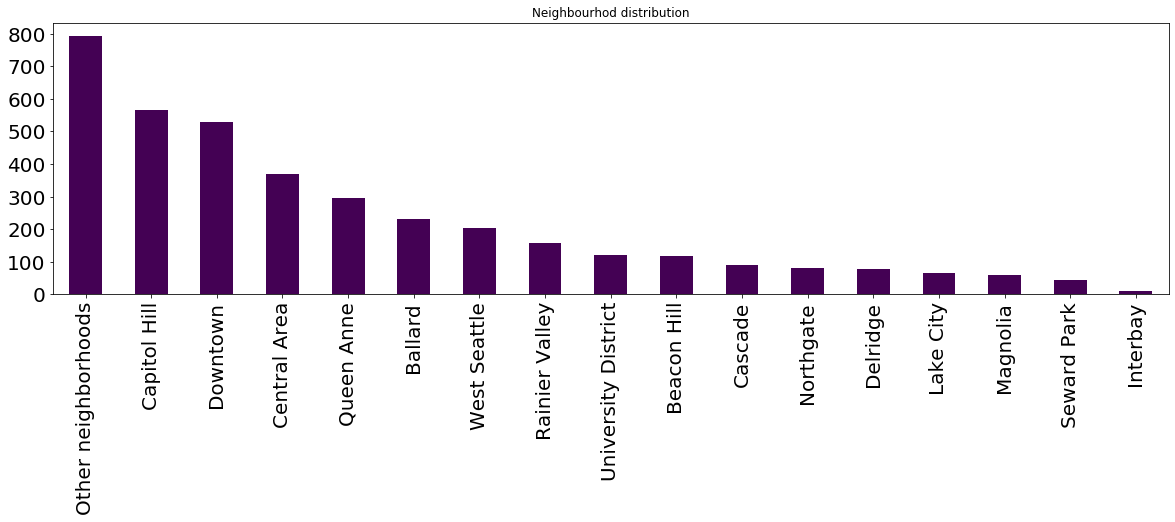

In [36]:
# Distribution of the different neighbourhoods
neighbourhood_df = listings_df[['price','neighbourhood_group_cleansed']].copy()
neighbourhood_df = neighbourhood_df.dropna()

neighbourhood_df.neighbourhood_group_cleansed.value_counts().plot.bar(figsize =(20,5),
                                                                fontsize=20,
                                                                colormap = 'viridis',
                                                                title = 'Neighbourhod distribution',
                                                                legend = False)

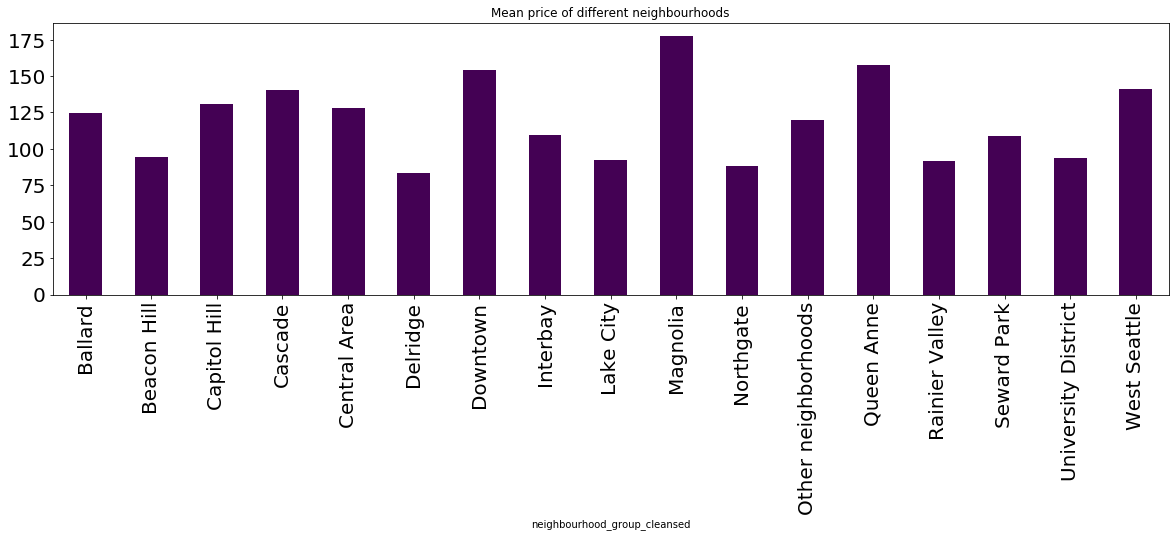

In [37]:
# Mean price for each neigbourhood
neighbourhood_df = listings_df[['price','neighbourhood_group_cleansed']].copy()
neighbourhood_df = neighbourhood_df.dropna()

neighbourhood_df.groupby(['neighbourhood_group_cleansed']).price.mean().plot.bar(figsize =(20,5),
                                                                fontsize=20,
                                                                colormap = 'viridis',
                                                                title = 'Mean price of different neighbourhoods',
                                                                legend = False)

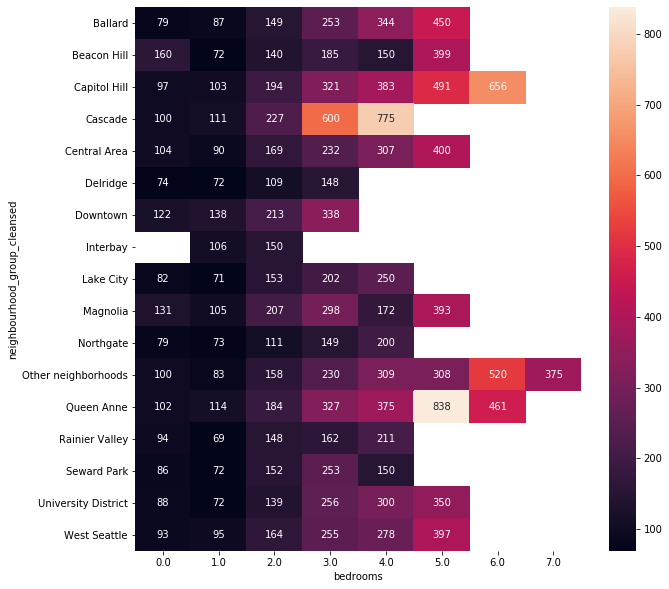

In [38]:
# Creation of a second heat map that displays the mean price with the location and the number of bedroom
heatmap_df = listings_df[['price','bedrooms','neighbourhood_group_cleansed']].copy()
heatmap_df = heatmap_df.dropna()
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(heatmap_df.groupby([
        'neighbourhood_group_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

#### Data Point 3: Super Host Status

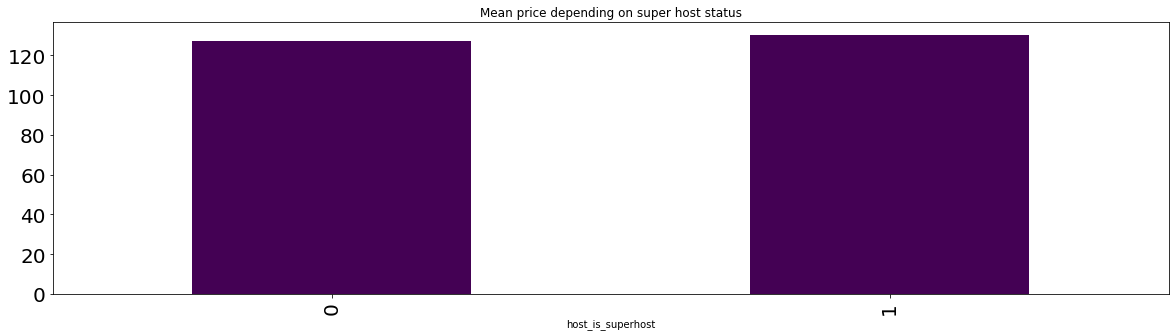

In [39]:
# Dependency of host_is_superhost status and price
price_host_is_superhost_df = listings_df[['host_is_superhost','price']].copy()
price_host_is_superhost_df = price_host_is_superhost_df.dropna()


plot_bar = price_host_is_superhost_df.groupby(['host_is_superhost']).price.mean().plot.bar(figsize =(20,5),
                                                                fontsize=20,
                                                                colormap = 'viridis',
                                                                title = 'Mean price depending on super host status',
                                                                legend = False)

#### Data Point 4: Listing Count

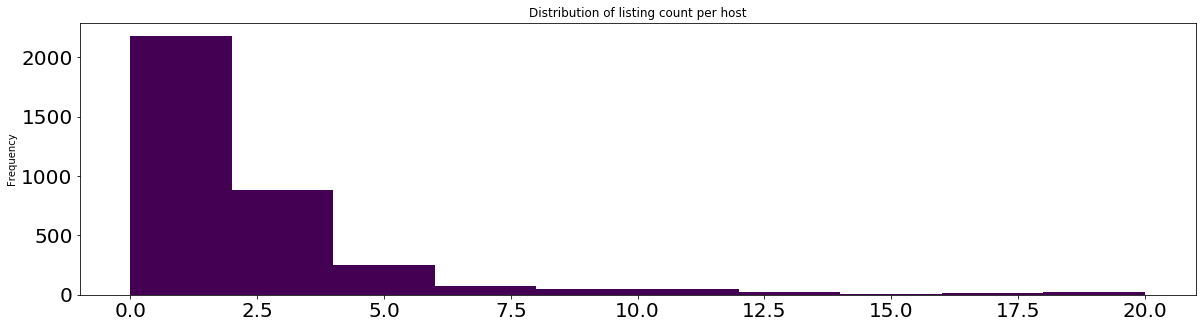

In [40]:
# How many listings does the most Airbnb hosts offer?
listing_counts = listings_df.host_total_listings_count.copy().dropna()

plot_bar = listing_counts.plot.hist(figsize =(20,5),
                                    bins=10,
                                    range=[0, 20],
                                    fontsize=20,
                                    colormap = 'viridis',
                                    title = 'Distribution of listing count per host',
                                    legend = False)


The histrogramm shows that most of the hosts have not many listings. But can the hosts can get a higher price the more appartments they have?

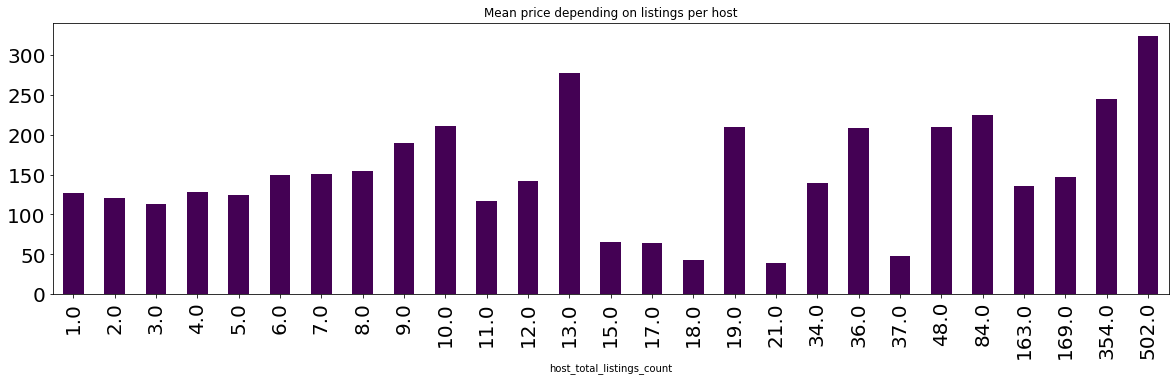

In [41]:
# Do people with more listings charge higher prices?
price_host_total_listings_count_df = listings_df[['host_total_listings_count','price']].copy()
price_host_total_listings_count_df = price_host_total_listings_count_df.dropna()

plot_bar = price_host_total_listings_count_df.groupby(['host_total_listings_count']).price.mean().plot.bar(figsize =(20,5),
                                                                fontsize=20,
                                                                colormap = 'viridis',
                                                                title = 'Mean price depending on listings per host',
                                                                legend = False)

### 4.2 Question 2: Is the price per night of an Airbnb appartment the more affordable the more people share an appartment per night?

Renting and entire room or appartment is much more expensive then renting a private room. The most affordable option is to rent a shared room.

The quantity of accommodates per listing listing does also vary. For how many people are the most accommodations and have groups any cost advantages?

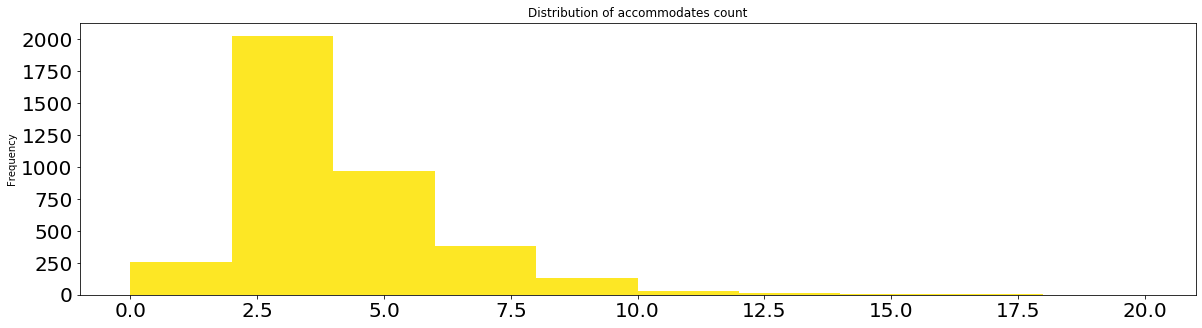

In [42]:
# For how many accommodates are the most listings?

price_accommodates_df = listings_df[['price','accommodates']]
plot_hist = price_accommodates_df.plot.hist(figsize =(20,5),
                                    bins=10,
                                    range=[0, 20],
                                    fontsize=20,
                                    colormap = 'viridis',
                                    title = 'Distribution of accommodates count',
                                    legend = False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The correlation-coefficient is -0.2505754527335701


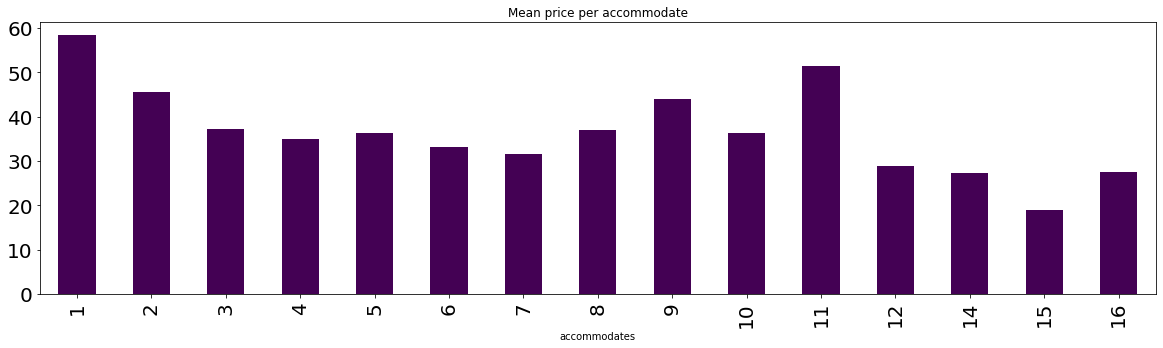

In [43]:
# Is an appartment per person the more affordable the larger the group?
price_accommodates_df['price_per_person'] = price_accommodates_df.price / price_accommodates_df.accommodates
price_accommodates_df

price_accommodates_df.groupby(['accommodates']).price_per_person.mean().plot.bar(figsize =(20,5),
                                    fontsize=20,
                                    colormap = 'viridis',
                                    title = 'Mean price per accommodate',
                                    legend = False)

print('The correlation-coefficient is', price_accommodates_df['accommodates'].corr(price_accommodates_df['price_per_person'],
                                                                      method='pearson'))

### 4.3 Question 3: Is there a seasonality in the prices?

In [44]:
# All of the data is in 2016 and 2017, hence, an analysis based on year is not effective
calendar_df.year.value_counts()

2016    928844
2017      5698
Name: year, dtype: int64

month
1     122.912176
2     124.293927
3     128.644488
4     135.097005
5     139.538183
6     147.473137
7     152.094150
8     150.656594
9     143.255949
10    137.031939
11    135.688738
12    137.251835
Name: price, dtype: float64

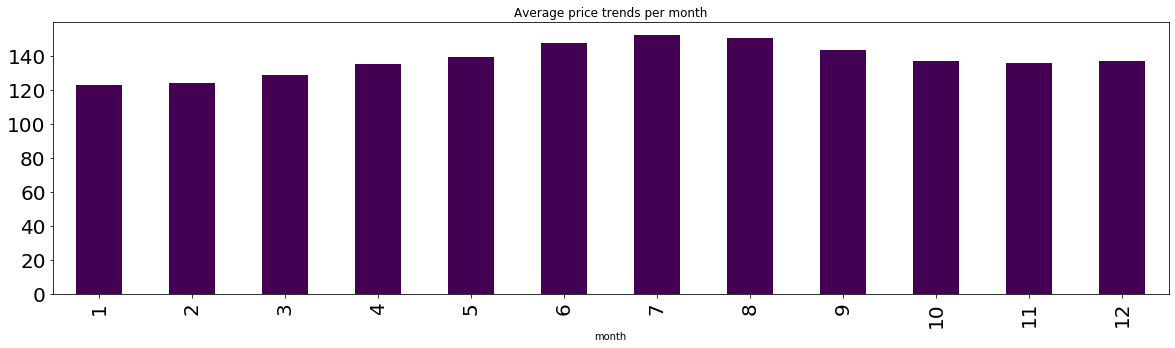

In [48]:
# The average price for each month
calendar_df.groupby(['month']).price.mean().plot.bar(figsize =(20,5),
                                                                fontsize=20,
                                                                colormap = 'viridis',
                                                                title = 'Average price trends per month',
                                                                legend = False)

calendar_df.groupby(['month']).price.mean()

weekday
0    135.676414
1    135.408764
2    135.447880
3    136.476032
4    143.036294
5    143.202136
6    136.459941
Name: price, dtype: float64

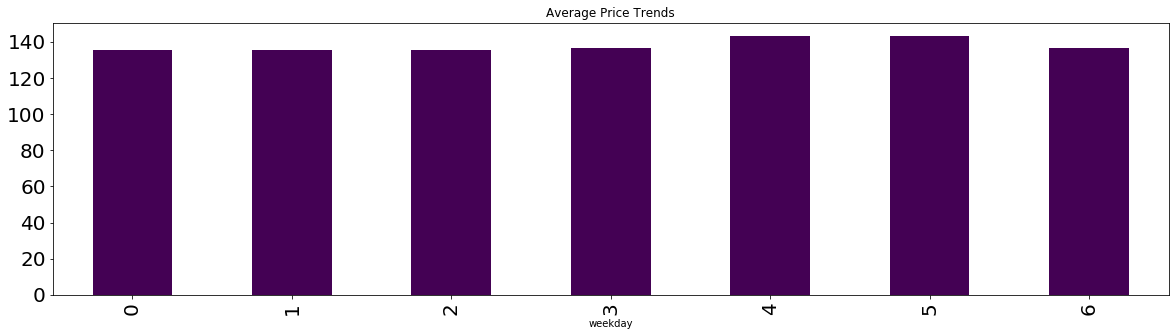

In [46]:
# The average price for each weekday
calendar_df.groupby(['weekday']).price.mean().plot.bar(figsize =(20,5),
                                                                fontsize=20,
                                                                colormap = 'viridis',
                                                                title = 'Average Price Trends',
                                                                legend = False)
calendar_df.groupby(['weekday']).price.mean()